# Gender diversity at the FNWI
---

In [1]:
# Environment setup
import matplotlib.pyplot as plt
from matplotlib import rc, colors
import numpy as np
import pandas as pd
import sys
import os

# Matplotlib config
plt.style.use('seaborn-muted')

In [2]:
# Import data sources
COL_NAMES = ['TYPE HOGER ONDERWIJS', 
             'INSTELLINGSNAAM ACTUEEL', 
             'CROHO ONDERDEEL', 
             'OPLEIDINGSNAAM ACTUEEL', 
             'OPLEIDINGSVORM', 
             'GESLACHT', 
             '2015', 
             '2016', 
             '2017', 
             '2018', 
             '2019']
enrollments = pd.read_csv('data/inschrijvingen-wo-2019.csv', sep=';', header=0, usecols=COL_NAMES)

In [3]:
# Filter out the UvA FNWI data specifically
is_uva = enrollments['INSTELLINGSNAAM ACTUEEL'] == 'Universiteit van Amsterdam'
is_nature = enrollments['CROHO ONDERDEEL'] == 'natuur'
is_bachelor = enrollments['TYPE HOGER ONDERWIJS'] == 'bachelor'
is_master = enrollments['TYPE HOGER ONDERWIJS'] == 'master'

uva_fnwi_bachelors = enrollments[is_uva & is_nature & is_bachelor]
uva_fnwi_masters = enrollments[is_uva & is_nature & is_master]

In [4]:
# Preview of what our data looks like
uva_fnwi_bachelors

,TYPE HOGER ONDERWIJS,INSTELLINGSNAAM ACTUEEL,CROHO ONDERDEEL,OPLEIDINGSNAAM ACTUEEL,OPLEIDINGSVORM,GESLACHT,2015,2016,2017,2018,2019
1373,bachelor,Universiteit van Amsterdam,natuur,B Psychobiologie,voltijd onderwijs,man,204,181,157,128,136
1374,bachelor,Universiteit van Amsterdam,natuur,B Psychobiologie,voltijd onderwijs,vrouw,474,473,489,507,533
1375,bachelor,Universiteit van Amsterdam,natuur,B Beta-gamma,voltijd onderwijs,man,250,255,253,247,222
1376,bachelor,Universiteit van Amsterdam,natuur,B Beta-gamma,voltijd onderwijs,vrouw,232,231,228,204,198
1377,bachelor,Universiteit van Amsterdam,natuur,B Scheikunde (joint degree),voltijd onderwijs,man,0,99,116,120,105
1378,bachelor,Universiteit van Amsterdam,natuur,B Scheikunde (joint degree),voltijd onderwijs,vrouw,0,55,84,85,79
1379,bachelor,Universiteit van Amsterdam,natuur,B Natuur- en Sterrenkunde (joint degree),voltijd onderwijs,man,0,187,233,273,297
1380,bachelor,Universiteit van Amsterdam,natuur,B Natuur- en Sterrenkunde (joint degree),voltijd onderwijs,vrouw,0,47,64,65,84
1381,bachelor,Universiteit van Amsterdam,natuur,B Informatiekunde,voltijd onderwijs,man,188,194,215,220,247
1382,bachelor,Universiteit van Amsterdam,natuur,B Informatiekunde,voltijd onderwijs,vrouw,45,62,67,68,63


## Bachelor Programs

Note: In the data for both Physics as well as Chemistry, there are duplicate rows, one with '(joint degree)' and one without. Since the data is not identical, we assume that they are each others complement and we can add them together. However, we should verify that this really is the case.

In [5]:
# Merge duplicate joint degree programs
uva_fnwi_bachelors = uva_fnwi_bachelors.replace({
        'B Scheikunde (joint degree)': 'B Scheikunde',
        'B Natuur- en Sterrenkunde (joint degree)': 'B Natuur- en Sterrenkunde'
    })
grouped_data = uva_fnwi_bachelors.groupby(['OPLEIDINGSNAAM ACTUEEL', 'GESLACHT']).aggregate(sum)

### Enrollments in the last 5 years

The table below shows the enrollments of each program per year over the last five years, for each gender.

TODO: find way to visualize this in an organised but complete way.

In [6]:
grouped_data

2015  2016  2017  2018  2019
OPLEIDINGSNAAM ACTUEEL      GESLACHT                              
B Beta-gamma                man        250   255   253   247   222
                            vrouw      232   231   228   204   198
B Biologie                  man        107    97    95    95    94
                            vrouw       76    73    84    82    84
B Informatica               man        270   282   293   323   352
                            vrouw       17    20    26    30    30
B Informatiekunde           man        188   194   215   220   247
                            vrouw       45    62    67    68    63
B Kunstmatige Intelligentie man        204   273   332   312   322
                            vrouw       43    68    92   102   104
B Natuur- en Sterrenkunde   man        312   302   300   310   297
                            vrouw       59    69    79    75    84
B Psychobiologie            man        204   181   157   128   136
                            vrouw      474   473   489   507   533
B Scheikunde                man        115   138   144   132   105
                            vrouw       59    70    94    89    79
B Wiskunde                  man        154   158   165   162   175
                            vrouw       47    45    43    52    47

### Gender diversity in 2019

In [7]:
data_2019 = uva_fnwi_bachelors.groupby(['OPLEIDINGSNAAM ACTUEEL', 'GESLACHT'])['2019'].sum()
data_2019.to_frame()

2019
OPLEIDINGSNAAM ACTUEEL      GESLACHT      
B Beta-gamma                man        222
                            vrouw      198
B Biologie                  man         94
                            vrouw       84
B Informatica               man        352
                            vrouw       30
B Informatiekunde           man        247
                            vrouw       63
B Kunstmatige Intelligentie man        322
                            vrouw      104
B Natuur- en Sterrenkunde   man        297
                            vrouw       84
B Psychobiologie            man        136
                            vrouw      533
B Scheikunde                man        105
                            vrouw       79
B Wiskunde                  man        175
                            vrouw       47

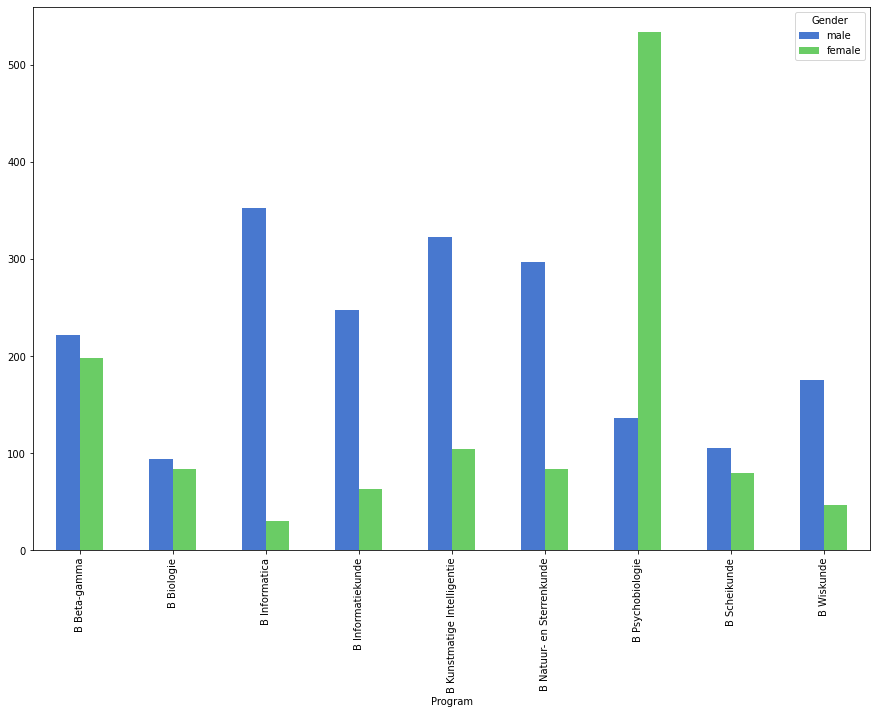

In [8]:
data_2019.unstack().plot(kind='bar', figsize=(15, 10))
plt.legend(['male', 'female'], title='Gender')
plt.xlabel('Program')
plt.show()